In [1]:
!git clone https://github.com/sunsmarterjie/yolov12.git

fatal: destination path 'yolov12' already exists and is not an empty directory.


In [1]:
cd yolov12

E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12


In [17]:
# I skipped this part because I didn't want to spend time to find the windows version of flash attention, you can still use the model without flash attention
!curl -O https://github.com/Dao-AILab/flash-attention/releases/download/v2.7.3/flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0


In [7]:
# at first I thought I had issues with python version with the flash attention, later to realize I was using the linux version. I was running ppython 3.12 earlier so I created a new venv with python 3.11.
import sys
print(sys.version)

3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [9]:
!pip install -r requirements.txt

ERROR: flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl is not a supported wheel on this platform.


In [10]:
!pip install -e .

Obtaining file:///E:/SDS-CP024-neurovision/submissions-team/andy-chen/model_training/CNN_yolov12/yolov12
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
     --------------------------------------- 12.9/12.9 MB 24.2 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 34.4 MB/s eta 0:00:00
     --------------------------------------- 39.5/39.5 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 42.2 MB/s eta 0:00:00
     --------------------------------------- 41.2/41.2 MB 38.4 MB/s eta 0:00:00
 

In [12]:
!pip install huggingface_hub

     ------------------------------------ 469.0/469.0 kB 625.0 kB/s eta 0:00:00


In [16]:
from ultralytics import YOLO

model = YOLO('yolov12n.yaml')

# Train the model
results = model.train(
  data='datasets/brain-tumor.yaml',
  epochs=30,
  batch=64,
  imgsz=640,
  scale=0.25,
  mosaic=0.8,
  device="cpu",
)

New https://pypi.org/project/ultralytics/8.3.91 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.63  Python-3.11.0 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i7-1360P)
engine\trainer: task=detect, mode=train, model=yolov12n.yaml, data=datasets/brain-tumor.yaml, epochs=30, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

100%|██████████| 755k/755k [00:00<00:00, 969kB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      2368  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2, 1, 2]          
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2, 1, 4]          
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    174720  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

train: Scanning E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\datasets\brain-tumor\train\labels... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:05<00:00, 155.42it/s]


train: New cache created: E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\datasets\brain-tumor\train\labels.cache


val: Scanning E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\datasets\brain-tumor\valid\labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:01<00:00, 150.11it/s]


val: New cache created: E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\datasets\brain-tumor\valid\labels.cache
Plotting labels to E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12\runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12\runs\detect\train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      3.672      6.351      4.318         67        640: 100%|██████████| 14/14 [09:18<00:00, 39.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [01:02<00:00, 31.06s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G       3.42      6.033      4.014         66        640: 100%|██████████| 14/14 [09:26<00:00, 40.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:48<00:00, 24.20s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      3.097      5.394      3.506         73        640: 100%|██████████| 14/14 [08:14<00:00, 35.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:48<00:00, 24.01s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      2.688      4.678      2.961         73        640: 100%|██████████| 14/14 [08:12<00:00, 35.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:48<00:00, 24.12s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      2.399      3.793      2.475         69        640: 100%|██████████| 14/14 [08:15<00:00, 35.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:45<00:00, 22.87s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      2.168      3.101      2.264         77        640: 100%|██████████| 14/14 [08:12<00:00, 35.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.03s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G       1.86      2.544      2.016         79        640: 100%|██████████| 14/14 [08:08<00:00, 34.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.44s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.695      2.212      1.831         80        640: 100%|██████████| 14/14 [08:09<00:00, 34.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.04s/it]

                   all        223        241          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.572      2.004      1.671         77        640: 100%|██████████| 14/14 [08:10<00:00, 35.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:45<00:00, 22.90s/it]

                   all        223        241      0.394      0.179      0.176     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.501      1.884       1.58         75        640: 100%|██████████| 14/14 [08:09<00:00, 34.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.12s/it]

                   all        223        241       0.37      0.244      0.207       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.413      1.731      1.503         75        640: 100%|██████████| 14/14 [08:11<00:00, 35.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.50s/it]

                   all        223        241      0.331      0.307      0.224      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.405       1.68      1.476         88        640: 100%|██████████| 14/14 [08:10<00:00, 35.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.20s/it]

                   all        223        241      0.367      0.484      0.331      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.318      1.616      1.403         84        640: 100%|██████████| 14/14 [08:10<00:00, 35.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.22s/it]

                   all        223        241      0.394      0.599      0.388      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.304      1.551      1.402         84        640: 100%|██████████| 14/14 [08:08<00:00, 34.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.20s/it]

                   all        223        241      0.443      0.693      0.441      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.297      1.542      1.405         77        640: 100%|██████████| 14/14 [08:11<00:00, 35.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:47<00:00, 23.63s/it]

                   all        223        241       0.41      0.704      0.441      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.288      1.473      1.381         84        640: 100%|██████████| 14/14 [08:09<00:00, 34.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.21s/it]

                   all        223        241      0.436       0.73      0.452      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G       1.24      1.435      1.339         90        640: 100%|██████████| 14/14 [08:10<00:00, 35.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.13s/it]

                   all        223        241      0.477      0.657      0.485      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.218      1.431      1.324         86        640: 100%|██████████| 14/14 [08:13<00:00, 35.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:45<00:00, 22.98s/it]

                   all        223        241      0.438      0.767      0.462      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.226      1.397      1.326         80        640: 100%|██████████| 14/14 [08:14<00:00, 35.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:47<00:00, 23.76s/it]

                   all        223        241      0.485      0.711      0.484      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G       1.21      1.365      1.305         77        640: 100%|██████████| 14/14 [08:10<00:00, 35.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.14s/it]

                   all        223        241      0.456      0.781      0.496      0.334


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.088        1.3      1.219         61        640: 100%|██████████| 14/14 [08:12<00:00, 35.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.12s/it]

                   all        223        241      0.465      0.681      0.481      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.059      1.266      1.187         66        640: 100%|██████████| 14/14 [08:11<00:00, 35.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:47<00:00, 23.55s/it]

                   all        223        241      0.465      0.738      0.492      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.063      1.245      1.197         63        640: 100%|██████████| 14/14 [08:09<00:00, 34.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.31s/it]

                   all        223        241      0.465      0.781      0.502      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.034      1.221      1.183         63        640: 100%|██████████| 14/14 [08:09<00:00, 34.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.26s/it]

                   all        223        241      0.476       0.74      0.519      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.026      1.207      1.175         65        640: 100%|██████████| 14/14 [08:12<00:00, 35.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:47<00:00, 23.60s/it]

                   all        223        241      0.446      0.809      0.508      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.004      1.202      1.163         66        640: 100%|██████████| 14/14 [08:11<00:00, 35.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.23s/it]

                   all        223        241      0.453      0.804      0.511      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.9844      1.176      1.143         61        640: 100%|██████████| 14/14 [08:10<00:00, 35.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.16s/it]

                   all        223        241      0.483      0.727      0.495      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.9825      1.161      1.146         63        640: 100%|██████████| 14/14 [08:09<00:00, 34.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.36s/it]

                   all        223        241      0.474      0.771      0.514      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.9652      1.148      1.128         65        640: 100%|██████████| 14/14 [08:10<00:00, 35.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:51<00:00, 25.52s/it]

                   all        223        241      0.452      0.818      0.503      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      0.951      1.138      1.127         64        640: 100%|██████████| 14/14 [08:09<00:00, 34.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:46<00:00, 23.36s/it]

                   all        223        241      0.459      0.778      0.505      0.358



30 epochs completed in 4.532 hours.
Optimizer stripped from E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12\runs\detect\train3\weights\last.pt, 5.4MB
Optimizer stripped from E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12\runs\detect\train3\weights\best.pt, 5.4MB

Validating E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12\runs\detect\train3\weights\best.pt...
Ultralytics 8.3.63  Python-3.11.0 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i7-1360P)
YOLOv12n summary (fused): 376 layers, 2,508,734 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:42<00:00, 21.29s/it]


                   all        223        241      0.487       0.74      0.519      0.359
              negative        142        154      0.609      0.721      0.579      0.396
              positive         81         87      0.364      0.759      0.459      0.322
Speed: 2.7ms preprocess, 181.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12\runs\detect\train3


In [21]:
results=model.val() #this is actually not required, during training validation is also done

Ultralytics 8.3.63  Python-3.11.0 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i7-1360P)


val: Scanning E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\datasets\brain-tumor\valid\labels.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.46s/it]


                   all        223        241      0.487       0.74      0.519      0.359
              negative        142        154      0.609      0.721      0.579      0.396
              positive         81         87      0.364      0.759      0.459      0.322
Speed: 3.0ms preprocess, 175.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to E:\SDS-CP024-neurovision\submissions-team\andy-chen\model_training\CNN_yolov12\yolov12\runs\detect\train33


In [1]:
from PIL import Image
from IPython.display import display

In [4]:
confusion_matrix = Image.open('yolov12/runs/detect/train3/confusion_matrix.png')

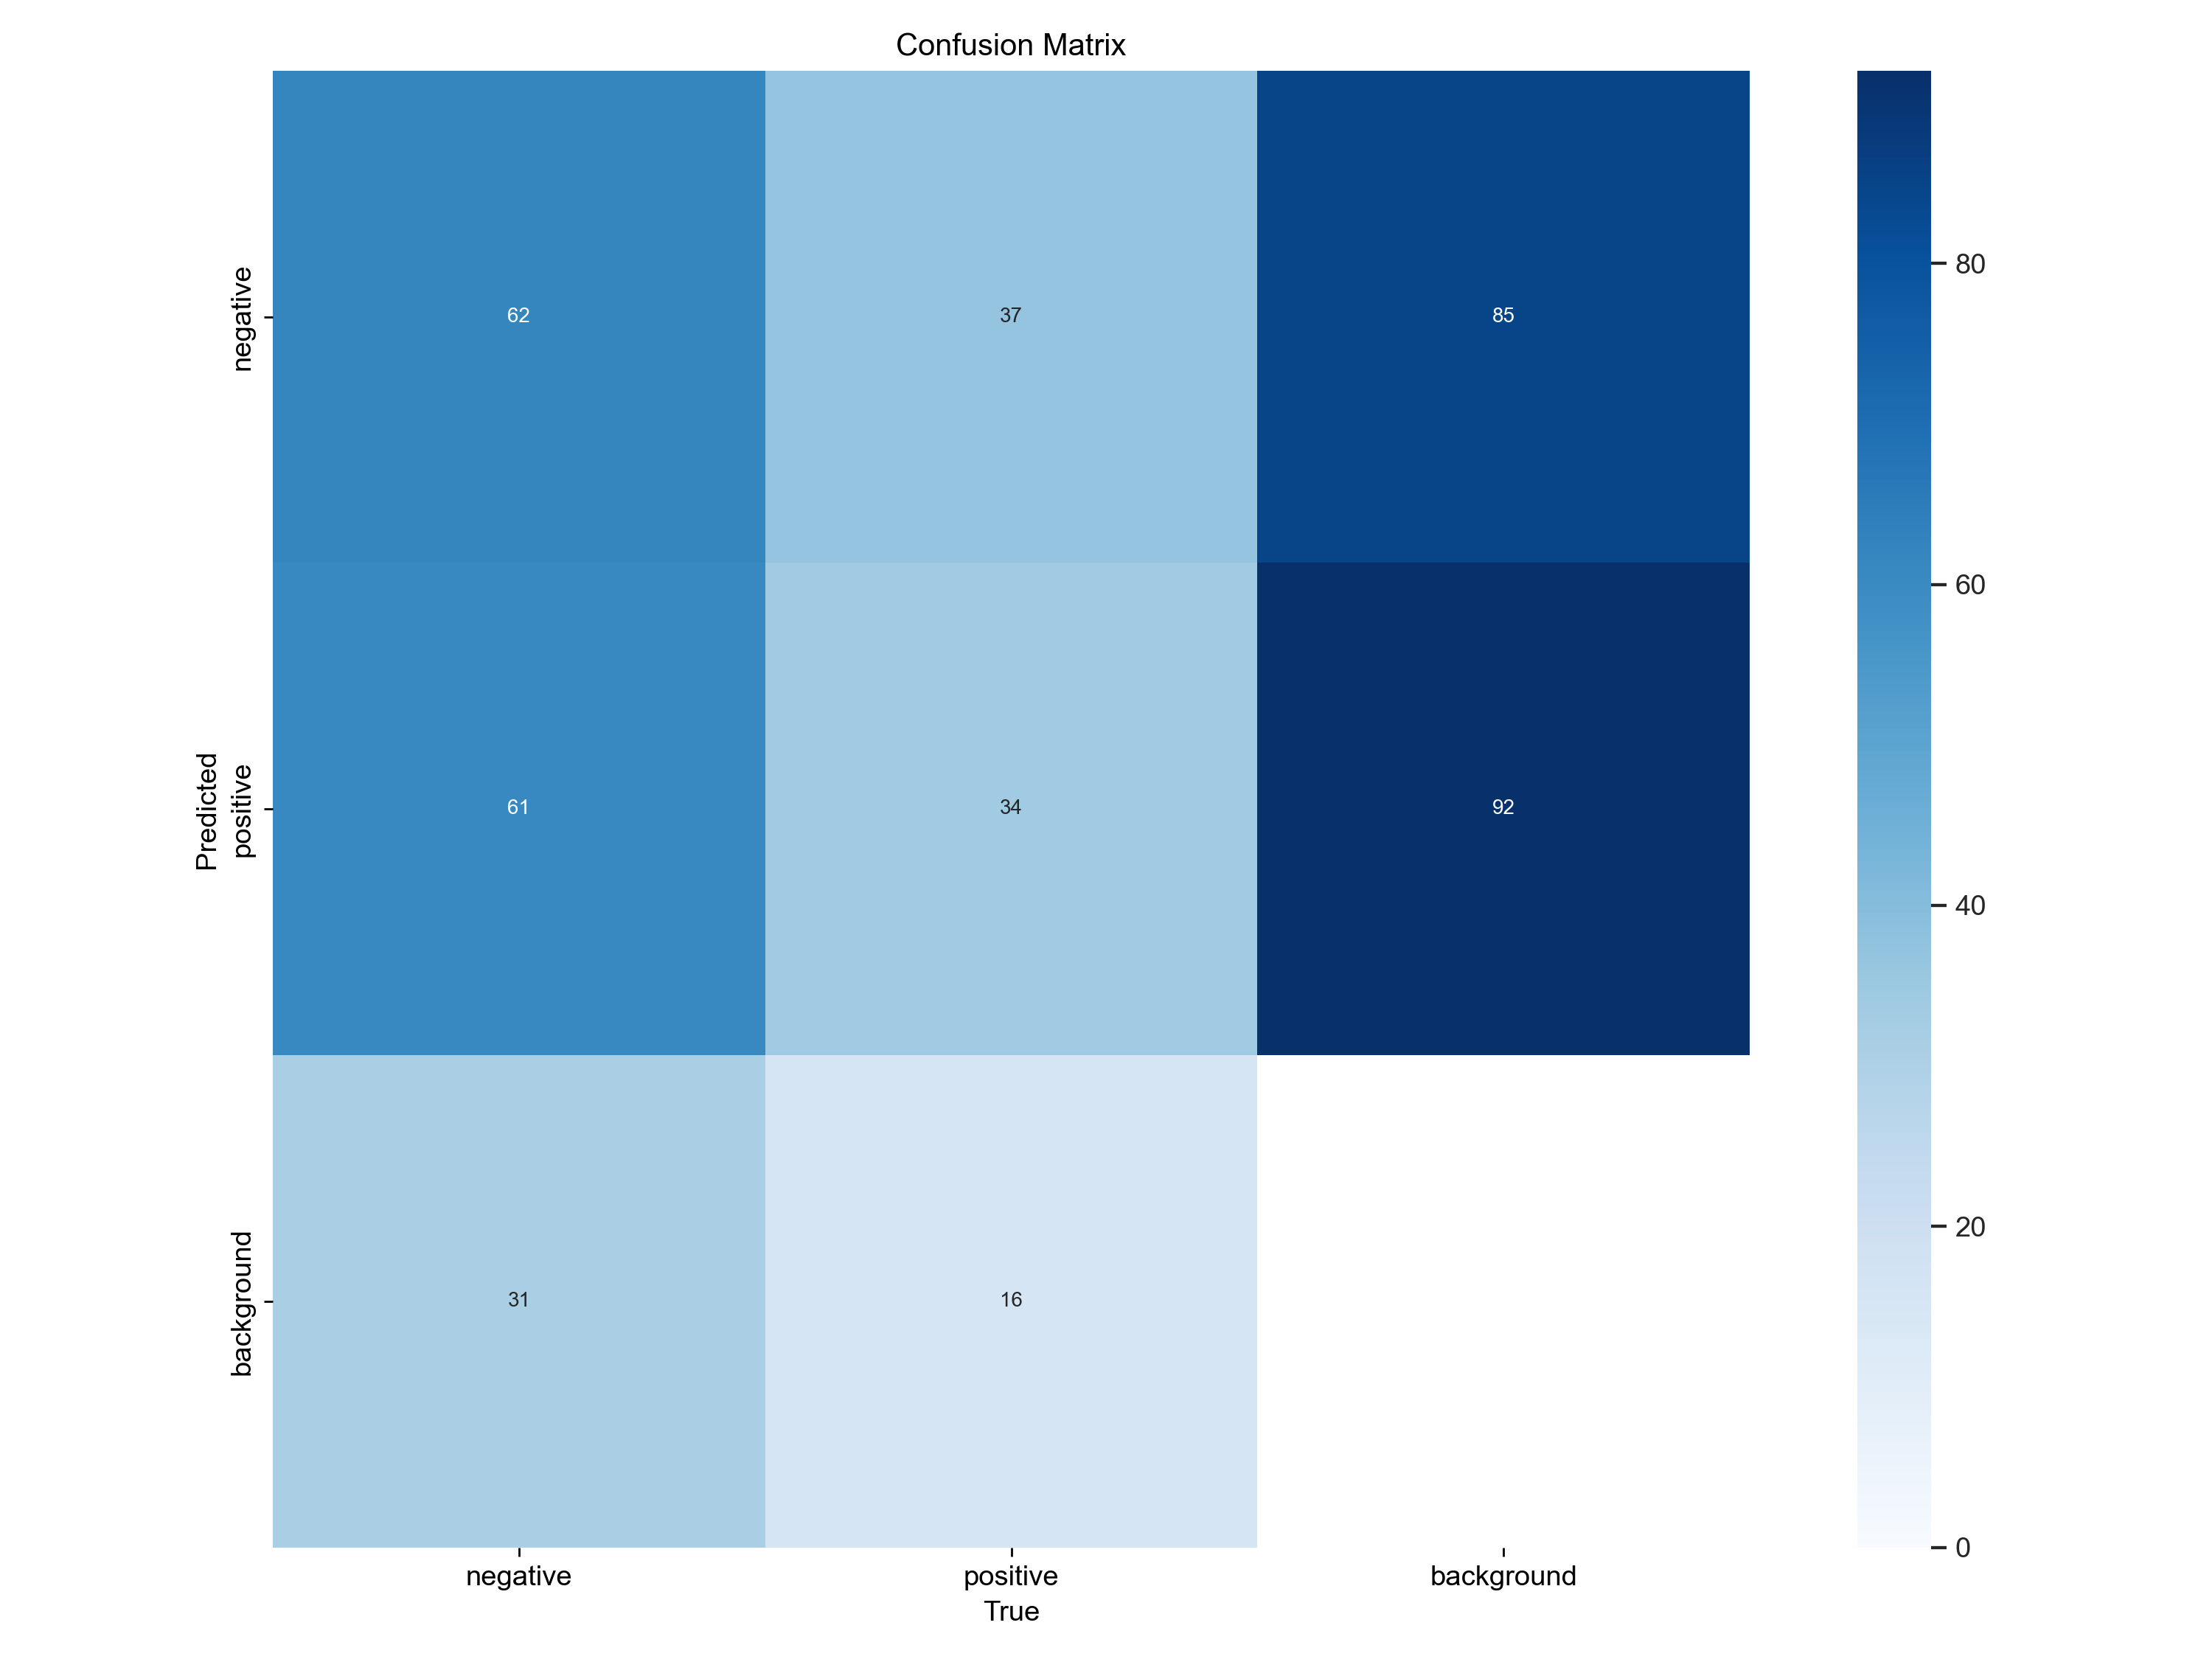

In [5]:
display(confusion_matrix)

In [7]:
from ultralytics import YOLO

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


In [9]:
# Load brain tumor model
best_yolov12_model = YOLO("yolov12/runs/detect/train3/weights/best.pt")  # load a custom trained model

# Export the model
best_yolov12_model.export(format="onnx")

Ultralytics 8.3.63  Python-3.11.0 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i7-1360P)
YOLOv12n summary (fused): 376 layers, 2,508,734 parameters, 0 gradients, 5.8 GFLOPs

PyTorch: starting from 'yolov12\runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
     ---------------------------------------- 14.5/14.5 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 142.9/142.9 kB ? eta 0:00:00
     ---------------------------------------- 11.8/11.8 MB 7.0 MB/s eta 0:00:00
     -------------------------------------- 431.0/431.0 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
     ---------------------------------------- 86.8/86.8 kB ? eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB ? eta 0:00:00

requirements: AutoUpdat

'yolov12\\runs\\detect\\train3\\weights\\best.onnx'